In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score




In [2]:
#hide warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("reviews.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
data["Reply"].fillna(0,inplace=True)
data["Number of words"] = data["Review"].apply(lambda x:  len(x.split()))
data["Number of characters"] = data["Review"].apply(lambda x:  len("".join(x.split())))


#create term frequency dataframe
TF1 = data["Review"].str.split(expand = True).stack().value_counts().reset_index()
TF1.columns = [ "words","counts" ]
TF1

,words,counts
0,to,65159
1,the,64751
2,I,59824
3,and,45966
4,it,34108
...,...,...
65556,"ffs,",1
65557,relike,1
65558,sorrows,1
65559,"song/episode,",1


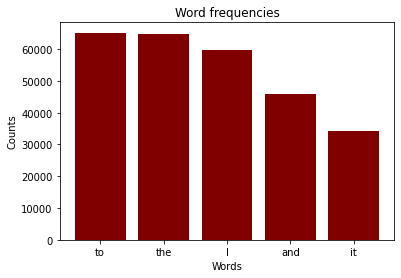

In [5]:
#visualization of data before cleaning

#word frequency visualization


plt.bar(TF1.words[:5],TF1.counts[:5],color ='maroon')
plt.title("Word frequencies")
plt.xlabel("Words")
plt.ylabel("Counts")



plt.show()

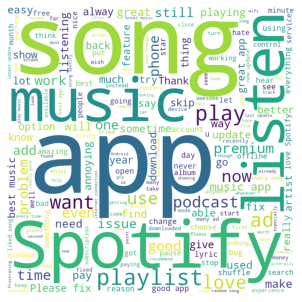

In [6]:
#wordcloud visualization

text = " ".join(i for i in data.Review)


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [7]:
df = data.copy()
df = df[["Review" , "Rating"]]

In [8]:
#lowercase conversion
df["Review"] = df["Review"].str.lower()

In [9]:
#remove punctuations
tokenizer = nltk.RegexpTokenizer(r"\w+")
df["Review"] = df["Review"].apply(lambda x: " ".join(tokenizer.tokenize(x)) )

In [11]:
#remove numbers
df["Review"] = df["Review"].apply(lambda x: " ".join(i for i in x.split() if i.isdigit() == False) )


In [12]:
#remove stopwords
df["Review"] = df["Review"].apply(lambda x: " ".join(i for i in x.split() if i not in stopwords.words('english')) )

In [13]:
# lemmatization

# nltk.download('wordnet')
# nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
df["Review"] = df["Review"].apply(lambda x: " ".join(lemmatizer.lemmatize(i) for i in x.split() ) )

In [14]:
#create term frequency dataframe2
TF2 = df["Review"].str.split(expand = True).stack().value_counts().reset_index()
TF2.columns = [ "words","counts" ]
TF2

,words,counts
0,app,36088
1,song,33398
2,music,25956
3,spotify,19123
4,play,13919
...,...,...
21865,shreksophone,1
21866,spoof,1
21867,looting,1
21868,lovetoo,1


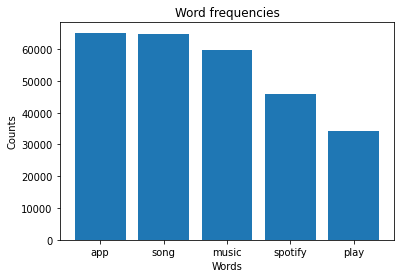

In [15]:
#visualization of data after cleaning

#word frequency visualization


plt.bar(TF2.words[:5],TF1.counts[:5])
plt.title("Word frequencies")
plt.xlabel("Words")
plt.ylabel("Counts")



plt.show()

# Future Engineering

In [16]:
df["Rating"].replace(1 , "negative",inplace=True)
df["Rating"].replace(2 , "negative",inplace=True)
df["Rating"].replace(4 , "positive",inplace=True)
df["Rating"].replace(5 , "positive",inplace=True)
df = df[ (df.Rating == 'negative') | (df.Rating == 'positive') ]
df.Rating.value_counts()


positive    29937
negative    24771
Name: Rating, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
 df.Review, df.Rating, test_size=0.1, random_state=42)

In [18]:
#Label encoding
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [20]:
X_train_vectorizer = vectorizer.transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)

# Modelling

In [21]:
#Logistic Regression

LOG = LogisticRegression(random_state=0).fit(X_train_vectorizer, y_train)
scores = cross_val_score(LOG, X_test_vectorizer, y_test, cv=10).mean()
print(f"Logistic Regression score : {scores}")

Logistic Regression score : 0.8592521917826499


In [22]:
#Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=1).fit(X_train_vectorizer, y_train)
scores = cross_val_score(RF, X_test_vectorizer, y_test, cv=10).mean()
print(f"Random Forest Classifier score : {scores}")

Random Forest Classifier score : 0.8360393119737386


In [23]:
#XGBOOST Model
XGB = XGBClassifier().fit(X_train_vectorizer, y_train)
scores = cross_val_score(XGB, X_test_vectorizer, y_test, cv=10).mean()
print(f"XGB Classifier score : {scores}")


[13:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Predicting

In [34]:
#Best model is XGB  which score is 0.86



text = "so good music"

text = vectorizer.transform([text])
# text.toarray()

XGB.predict(text)

array([1])

In [33]:
text = "so bad music"

text = vectorizer.transform([text])
# text.toarray()

LOG.predict(text)

array([0])